In [212]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
path = 'C:\\Users\\user\\Documents\\Karpov Courses\\Python\\lesson_4\\data'
dates = os.listdir(path)
dates


['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [195]:
d = {'product_id' : [None], 'quantity': [None], 'name': [None], 'date': [None]}
df = pd.DataFrame(data=d)
df

,product_id,quantity,name,date
0,None,None,None,None


In [196]:
for dates in dates:
    names = os.listdir(path + '\\' + dates[0:12])
    for name in names:
        file = str(path + '\\' + dates[0:12] + '\\' + str(name) + '\\' + 'data.csv')
        df1 = pd.read_csv(file)
        df1['name'] = str(name)
        df1['date'] = dates
        df = pd.concat([df, df1])
               

In [123]:
path + '\\' + dates[1]

'C:\\Users\\user\\Documents\\Karpov Courses\\Python\\lesson_4\\data\\2020-12-04'

In [173]:
pd.read_csv('C:\\Users\\user\\Documents\\Karpov Courses\\Python\\lesson_4\\data\\2020-12-03\\Alexey_Smirnov\\data.csv')

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4
5,5,94,4


In [186]:
df.shape

(162, 5)

In [197]:
df = df.reset_index(drop=True)

In [198]:
df = df.dropna()

In [199]:
df.pop('Unnamed: 0')

1      0.0
2      1.0
3      2.0
4      3.0
5      4.0
      ... 
157    1.0
158    2.0
159    0.0
160    1.0
161    2.0
Name: Unnamed: 0, Length: 161, dtype: float64

In [200]:
df

,product_id,quantity,name,date
1,47,1,Alexey_Smirnov,2020-12-03
2,57,1,Alexey_Smirnov,2020-12-03
3,14,2,Alexey_Smirnov,2020-12-03
4,52,1,Alexey_Smirnov,2020-12-03
5,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
157,66,4,Rostislav_Petrov,2020-12-09
158,39,2,Rostislav_Petrov,2020-12-09
159,82,4,Vasiliy_Ivanov,2020-12-09
160,74,2,Vasiliy_Ivanov,2020-12-09


In [201]:
df['quantity'].sum()

480

In [207]:
#Определяем покупателя с наибольшим количеством покупок
df.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .rename(columns={'quantity' : 'sum'}) \
    .sort_values('sum', ascending=False)


,name,sum
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [221]:
#Топ-10 проданных по количеству товаров
df_top10_product = df.groupby('product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)

df_top10_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


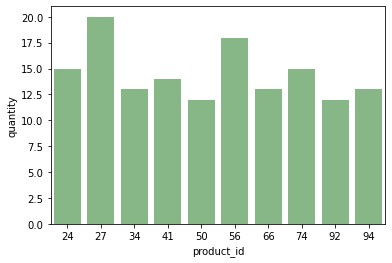

In [222]:
ax = sns.barplot(x=df_top10_product.product_id, y=df_top10_product.quantity, color='green', alpha=0.5)

In [224]:
df

,product_id,quantity,name,date
1,47,1,Alexey_Smirnov,2020-12-03
2,57,1,Alexey_Smirnov,2020-12-03
3,14,2,Alexey_Smirnov,2020-12-03
4,52,1,Alexey_Smirnov,2020-12-03
5,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
157,66,4,Rostislav_Petrov,2020-12-09
158,39,2,Rostislav_Petrov,2020-12-09
159,82,4,Vasiliy_Ivanov,2020-12-09
160,74,2,Vasiliy_Ivanov,2020-12-09


In [252]:
df.date = pd.to_datetime(df.date)

In [226]:
df.head()

,product_id,quantity,name,date
1,47,1,Alexey_Smirnov,2020-12-03
2,57,1,Alexey_Smirnov,2020-12-03
3,14,2,Alexey_Smirnov,2020-12-03
4,52,1,Alexey_Smirnov,2020-12-03
5,1,4,Alexey_Smirnov,2020-12-03


In [227]:
#Продажи по дням

In [271]:
df_sales_day = df.groupby('date', as_index=False) \
    .agg({'quantity' : 'sum'}) \
    .sort_values('date')

df_sales_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


In [263]:
df_sales_day.date

1   2020-12-04
4   2020-12-07
6   2020-12-09
5   2020-12-08
2   2020-12-05
0   2020-12-03
3   2020-12-06
Name: date, dtype: datetime64[ns]

In [264]:
df_sales_day.date = df_sales_day.date.astype('datetime64[D]')

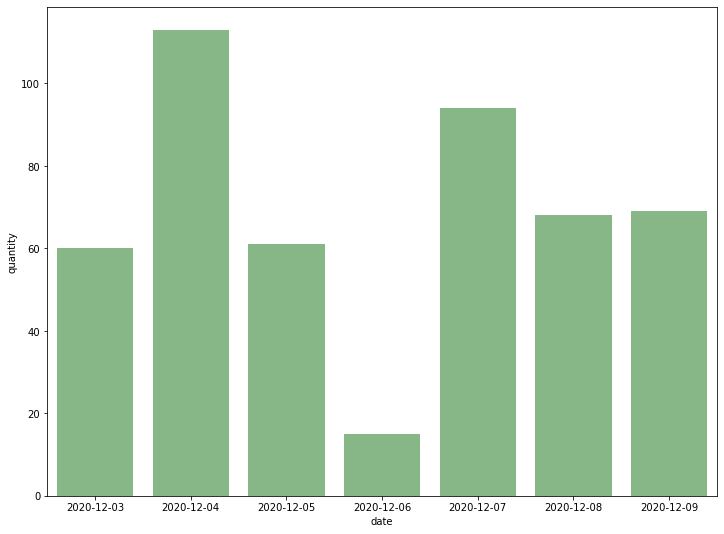

In [272]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=df_sales_day.date.dt.date, y=df_sales_day.quantity, color='green', alpha=0.5)

In [275]:
df.head()

,product_id,quantity,name,date
1,47,1,Alexey_Smirnov,2020-12-03
2,57,1,Alexey_Smirnov,2020-12-03
3,14,2,Alexey_Smirnov,2020-12-03
4,52,1,Alexey_Smirnov,2020-12-03
5,1,4,Alexey_Smirnov,2020-12-03


In [331]:
#Сколько пользователей приобрели один и тот же товар повторно
#Повторно = в разные дни

In [332]:
df_repeat_purchases = df.drop_duplicates(subset=[ 'date', 'product_id', 'name'])

In [333]:
df_repeat_purchases

,product_id,quantity,name,date
1,47,1,Alexey_Smirnov,2020-12-03
2,57,1,Alexey_Smirnov,2020-12-03
3,14,2,Alexey_Smirnov,2020-12-03
4,52,1,Alexey_Smirnov,2020-12-03
5,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
157,66,4,Rostislav_Petrov,2020-12-09
158,39,2,Rostislav_Petrov,2020-12-09
159,82,4,Vasiliy_Ivanov,2020-12-09
160,74,2,Vasiliy_Ivanov,2020-12-09


In [334]:
df_repeat_purchases.groupby(['name', 'product_id']).agg({'date':'count'}).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [335]:
#Чтение excel и txt


In [386]:
dfs = pd.read_excel('4_inn.xls')

In [387]:
#dfs['income,RUB'] = dfs['income,RUB'].astype('int')

In [389]:
dfs.head()

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [390]:
dfs['income,RUB'].sum()

103989753020514

In [391]:
dfs.dtypes

Unnamed: 0                 int64
#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [392]:
INN = pd.read_csv('4_necessary_inn.txt', sep=" ", header=None)
INN.head()

,0
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615


In [393]:
INN.values.tolist()
inn = []
for i in INN.values.tolist():
    inn.append(str(i).strip("[]"))
inn = [int(i) for i in inn]
inn

[394609645484,
 281578625230,
 923769811917,
 998694734508,
 271011690615,
 924952812367,
 646685244561,
 581531230312,
 841967395801,
 962179889311,
 873191383820,
 590538076039,
 194319975048,
 614658394086,
 571270160555,
 609400911893,
 595260069852,
 706966142477,
 173050718969,
 968048428696,
 806967744814,
 575198252501,
 283081417246,
 663119569897,
 600958529354,
 280452832937,
 415557497037,
 195142638722,
 472181033836,
 722903871682,
 442387408954,
 196518820495,
 653798670054,
 126259856639,
 175482780898,
 192518356612,
 817648134701,
 321724220657,
 864970037680,
 822991191528,
 205472219644,
 532801459453,
 657038381012,
 197916669463,
 849814898285,
 617082656257,
 500480544925,
 765833725639,
 263518962896,
 415856290529,
 812729265571,
 688172366656,
 837771137752,
 456294893364,
 668157292633,
 491435460276,
 323896131459,
 664667769879,
 293128896936,
 833493884251,
 120708914823,
 860475372268,
 172328288163,
 452188261986,
 818829342640,
 948029225406,
 310163740

In [394]:
dfs.query('head_inn in @inn')['income,RUB'].sum()

6104522627393